# SMD-Zettel Nr. 2

## Aufgabe 1 

### Aufgabenteil a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections

Erstelle die aus der Vorlesung bekannte *LCG Funktion*. 
Mit dem Parameter `norm` kann eingestellt werden, ob die Zufallszahlen normiert sein sollen.
Der Parameter `test_eff` prüft die Periodenlänge der Zufallszahlen (noch langsam). 

In [2]:
def LCG(N, x_0, a, c, m, norm = False, test_eff = False): 
    random_numbers = []
    
    for i in range( int(N) ):
        if i != 0:
            x_plus = ( (a * random_numbers[-1] + c) % m )
            random_numbers.append(x_plus)
        else:
            x_plus = ( (a * x_0 + c) % m )
            random_numbers.append(x_plus)
            
        if test_eff == True:
            if len( np.array(random_numbers[:-1])[ np.array(random_numbers[:-1]) == random_numbers[i]] ) != 0:
                print('Doppeltes Element bei i =',i)
                return i
                break
        
    if norm == True:
        return np.array(random_numbers)/m
    
    return np.array(random_numbers)

In [3]:
LCG(1000, 1, 3, 3, 1024, norm = False, test_eff = True)

Doppeltes Element bei i = 512


512

Generiere für die späteren Aufabenteile Zufallszahlen.
Die Parameter sind [hier](https://en.wikipedia.org/wiki/Linear_congruential_generator) entommen worden.
Die Periodenlänge wurde zu $>10^5$ bestimmt.

In [4]:
# source: https://en.wikipedia.org/wiki/Linear_congruential_generator
x_0 = 1
a = 1664525
c = 1013904223
m = 2**32 #Ausschöpfung des 32 Bit Bereichs + Primzahl

numbers = LCG(1e6, x_0, a, c, m, norm = True, test_eff = False)

Auf ein festes Intervall $[x_0, x_1]$ können die  _normierten_ Zufallszahlen mittels der Funktion `linear_trafo` transformiert werden.

In [5]:
def linear_trafo(random_numbers, x_0, x_1):
    assert x_1 > x_0
    return (x_1 - x_0) * random_numbers + x_0

## Aufgabenteil b)

Die Normierungskonstante $N$ der Funktion $f(t)$
lautet $N=\frac{1}{\tau}$.
Die Transformationsvorschrift $T(u)$ für die erzeugten Zufallszahlen $u\in\left[0,1\right)$ erhält man wie folgt:

$$
\begin{aligned}
F(x)&=\int_{0}^{x} N \exp\left(-\frac{t}{\tau}\right)\mathrm{d}t\\
&=-\left(\exp\left(-\frac{x}{\tau}\right)-1\right)\\
F(x) &\overset{!}{=}u\\
\Leftrightarrow \quad x&=T(u):=-\tau\ln(1-u)
\end{aligned}
$$



In [6]:
def T_b(random_numbers, tau):
    return -tau * np.log(1 - random_numbers)

(array([7.31496e+05, 1.96374e+05, 5.29900e+04, 1.40390e+04, 3.70400e+03,
        9.94000e+02, 3.05000e+02, 6.80000e+01, 2.40000e+01, 6.00000e+00]),
 array([2.61468847e-06, 1.31617744e+01, 2.63235462e+01, 3.94853180e+01,
        5.26470899e+01, 6.58088617e+01, 7.89706335e+01, 9.21324053e+01,
        1.05294177e+02, 1.18455949e+02, 1.31617721e+02]),
 <a list of 10 Patch objects>)

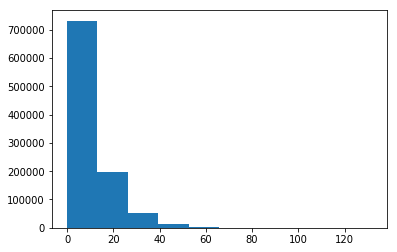

In [7]:
plt.hist(T_b(numbers, 10))

## Aufgabenteil c)

Die Nomrmierung $N$ der Funktion $f(x)$ lautet
$$ N = \frac{n-1}{x_{\mathrm{max}}^{-n+1}-x_{\mathrm{min}}^{-n+1}}$$

Die Transformationsformel $T(u)$ der Zufallszahlen $u$ ergibt sich wie folgt:

$$
\begin{aligned}
F(x)&=\int_{x_{\mathrm{min}}}^x N x'^{-n}\mathrm{d}x'\\
&=\frac{1}{ x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} }\left(x^{-n+1}-x_{\mathrm{min}}^{-n+1}\right)\\
F(x)&\overset{!}{=}u\\
\Leftrightarrow \quad T(u):=x&=\left(\left(x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} \right)u+x_{\mathrm{min}}^{1-n}\right)^{\frac{1}{1-n}}
\end{aligned}
$$

Die Transformation funktioniert nur für folgende Defintionsmengen:
$$
\begin{aligned}
x_{\mathrm{min}},\, x_{\mathrm{max}} \in \mathbb{R}^+/\{0\} \quad \vee \quad
x_{\mathrm{min}},\, x_{\mathrm{max}} \in \mathbb{R}^-/\{0\}
\end{aligned}
$$

In [8]:
def T_c(random_numbers, x_min, x_max, n):
    assert  (x_max > x_min)
    assert n > 1
    exponent = 1-n
    return ( (x_max**exponent - x_min**exponent) * random_numbers + x_min**exponent )**(1/exponent)

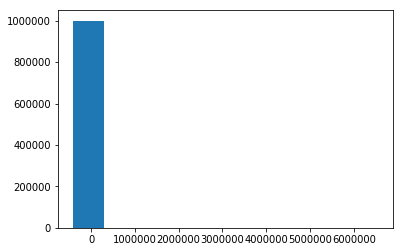

In [9]:
plt.hist(T_c(numbers, -1, 2, 2));
#plt.plot(numbers,T_c(numbers, 1,5,3))

## Aufgabenteil d)

Die Normierungskonstante $N$ lautet:
$$ N=\frac{1}{\arctan(x_\mathrm{max})-\arctan(x_\mathrm{min})}$$

Für den Speziallfall $x_\mathrm{min}=-\infty$ und $x_\mathrm{max}=\infty$ ist $N=\pi$.


Die Transformationsformel $T(u)$ der Zufallszahlen $u$ ergibt sich durch folgende Rechnung:

$$\begin{aligned}
F(x)&=\frac{1}{N}\int_{x_{\mathrm{min}}}^x\frac{1}{1+x'^2}\mathrm{d}x'\\
&=\frac{1}{N}\left( \arctan(x) - \arctan(x_{\mathrm{min}}\right)\\
F(x)&\overset{!}{=} u\\
\Leftrightarrow \quad T(u):=x&=\tan(\left(\arctan(x_\mathrm{max})-\arctan(x_\mathrm{min}\right)) u + \arctan(x_{\mathrm{min}}))
\end{aligned}$$

In [10]:
def T_c(random_numbers, x_min, x_max):
    assert x_max > x_min
    
    return np.tan((np.arctan(x_max) - np.arctan(x_min)) * random_numbers + np.arctan(x_min))

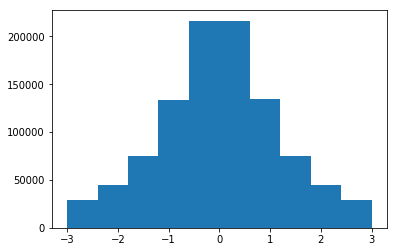

In [11]:
plt.hist(T_c(numbers,-3,3));

Importierte die Datei `empirisches_histogramm.npy`. 
Die in der Datei enthaltente Verteilung wird im Weiteren als $p(x)$ bezeichnet.

In [12]:
data = np.load("./empirisches_histogramm.npy")

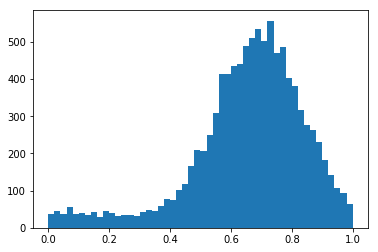

In [13]:
plt.hist(data['bin_mid'], bins=np.linspace(0., 1., 51), weights=data['hist']);

Bestimme die maximale Höhe von $p(x)$:

In [14]:
p_max = max(data['hist'])
print('Maximale Höhe von p(x):',p_max)

Maximale Höhe von p(x): 557.0


Verfahre mit dem *Neumann'schen Rückweisungsverfahren*, dazu benötige ich zwei Zufallszahlen $u_1$ und $u_2$. Wobei die Wertebereiche der beiden Zufallszahlen der Verteilung $p(x)$ angepasst werden müssen:

$$u_1\in\left[0,1\right], \quad u_2\in\left[0,\mathrm{max}(p(x))\right]=\left[0,557\right]$$


In [15]:
u_1 = LCG(1e6, 1, a, c, m, norm = True, test_eff = False)
u_2 = linear_trafo(LCG(1e6, 2, a, c, m, norm = True, test_eff = False),0, p_max) 

Erstelle nun eine Funktion die genau die Zahlen raussucht, die in den Daten aus 
`empirisches_histogramm.npy` liegen.

In [16]:
def neumann_random(random_numbers_x, random_numbers_y, real_x_values, real_y_values):
    good_number = []
    for i in range(len(real_x_values)):
        possible_u_1_index = np.abs(u_1 - real_x_values[i]) < 2e-3
        possible_u_2_index = random_numbers_y < real_y_values[i]
        valid_numbers = random_numbers_x[(possible_u_1_index == True) & (possible_u_2_index == True)]
       
        good_number.extend(valid_numbers.tolist())

    return np.array(good_number) 

In [17]:
good_numbers = neumann_random(u_1, u_2, data['bin_mid'], data['hist'] )
print(collections.Counter(good_numbers).most_common(2))

[(0.009198331041261554, 1), (0.010865078307688236, 1)]


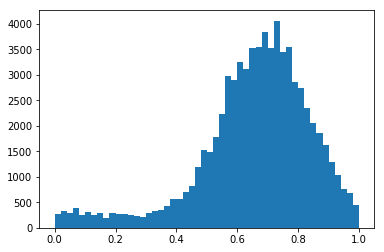

In [18]:
plt.hist(good_numbers, bins=np.linspace(0., 1., 51));

__----------------------------------------------------------------------------------------__

__----------------------------------------------------------------------------------------__

__----------------------------------------------------------------------------------------__

## Aufgabe 2

Verwende die in Aufgabenteil definierte Funktion.

In [19]:
def LCG(N, x_0, a, c, m, norm = False, test_eff = False): 
    random_numbers = []
    
    for i in range(int(N)):
        if i != 0:
            x_plus = ( (a * random_numbers[-1] + c) % m )
            random_numbers.append(x_plus)
        else:
            x_plus = ( (a * x_0 + c) % m )
            random_numbers.append(x_plus)
            
        if test_eff == True:
            temporary_array = np.array(random_numbers[:-1])
            if len( temporary_array[ temporary_array == random_numbers[i]] ) != 0:
                print('Doppeltes Element bei i =',i)
                return i
                break
    
    if norm == True:
        return np.array(random_numbers)/m
    
    return np.array(random_numbers)


### Aufgabenteil a)

In [20]:
b = 3
m = 1024

In [21]:
length_list = []
a = []
# Schaue mit Startwerte im Breich im Intervall 0-100 in zweier Schritten an.
for i in range(0, 100, 1):
    
    #Da ich test_eff=True gesetzt habe, gibt die Funktion nicht mehr die Zufallszahlen zurück, sondern 
    # die Periodenlänge
    length = LCG(1e4, 1, i, b, m, norm = True, test_eff = True)
    length_list.append(length)
    a.append(i)   
    
# Konvertiere noch die Listen zu Numpy arrays

length_list = np.array(length_list)
a = np.array(a)

Doppeltes Element bei i = 1
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 8
Doppeltes Element bei i = 512
Doppeltes Element bei i = 5
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 7
Doppeltes Element bei i = 256
Doppeltes Element bei i = 3
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 8
Doppeltes Element bei i = 512
Doppeltes Element bei i = 5
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 6
Doppeltes Element bei i = 128
Doppeltes Element bei i = 3
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 8
Doppeltes Element bei i = 512
Doppeltes Element bei i = 5
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 7
Doppeltes Element bei i = 256
Doppeltes Element bei i = 3
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 8
Doppeltes Element bei i = 512
Doppeltes Element bei i = 5
Doppeltes Element bei i = 1024
Doppeltes Element bei i = 5
Doppeltes Element bei i = 64
Doppeltes Element bei i = 2
Doppeltes Element bei i = 1024
Doppel

Die maximale Periodenlänge ist:

In [22]:
print('Maximale Länge:',max(length_list))

Maximale Länge: 1024


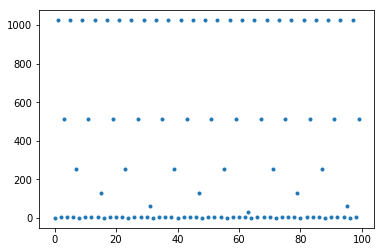

In [23]:
plt.plot(a,length_list,'.')

In [24]:
a[length_list == max(length_list)]

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])

Die Bedingung aus der Vorlesung war das $(a-1)$ durch $2$ und durch $4$ teilbar sein muss, das ist hier auch erfüllt.

Lege die Parameter für den Generator nach dem Zettel fest

In [25]:
a = 1601
b = 3456
m = 10000

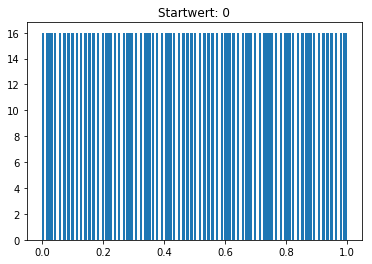

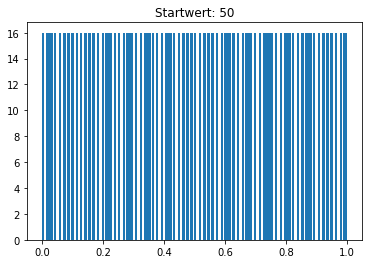

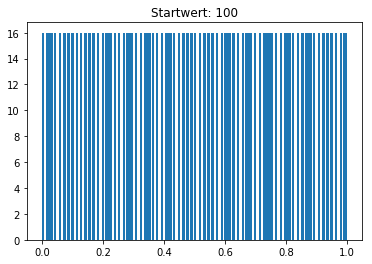

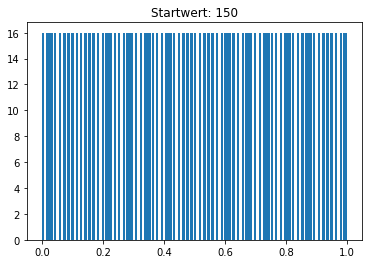

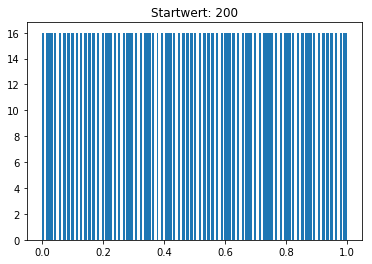

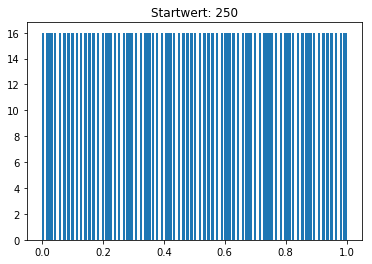

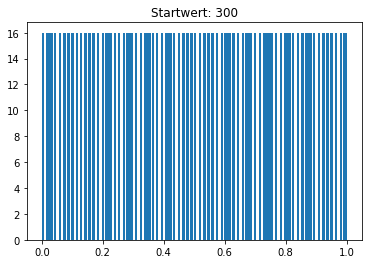

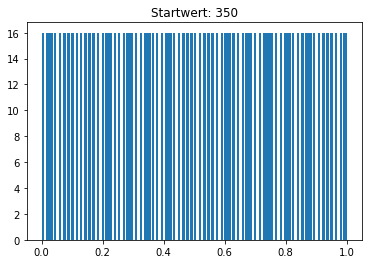

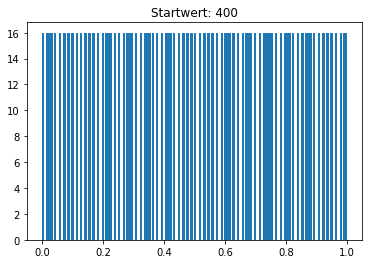

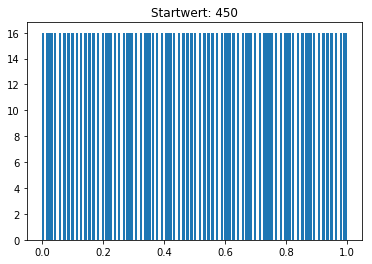

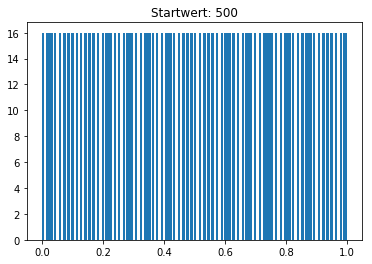

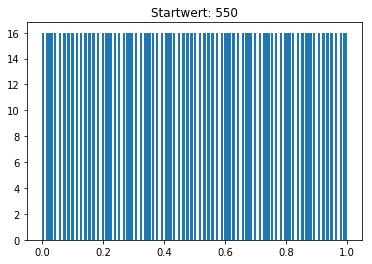

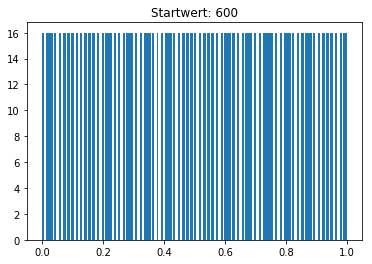

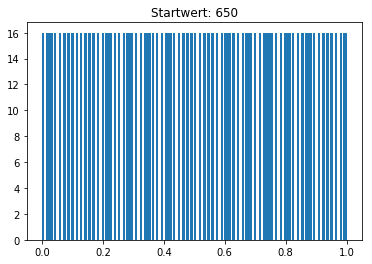

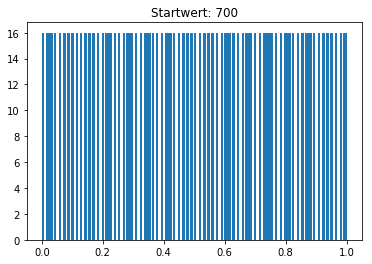

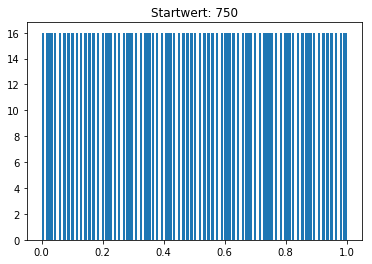

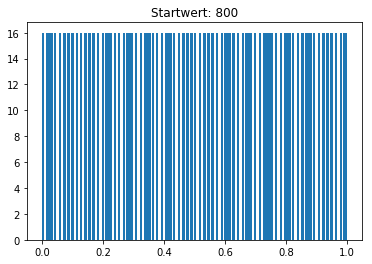

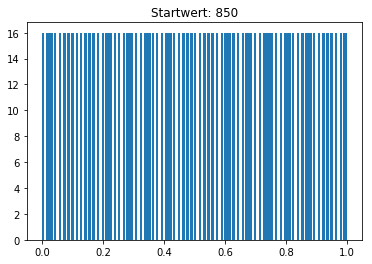

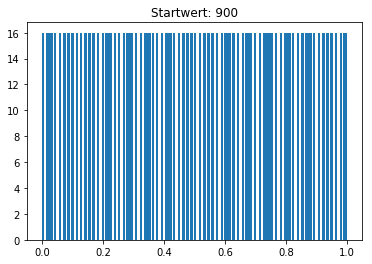

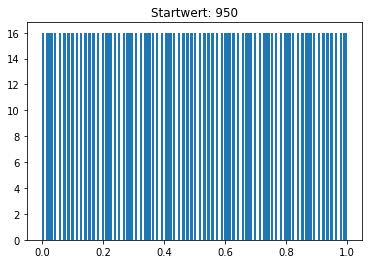

In [26]:
for i in range(0,1000,50):
    random_numbers = LCG(1e4, i, a, b, m, norm = True, test_eff = False)
    plt.hist(random_numbers, bins=1000)
    plt.title(f'Startwert: {i}')
    plt.show()

Deutlich zu erkennen ist das sich Ebenen ausbilden. Eine Eigenschaft die sich auch später in den Scatter Plots zeigts.

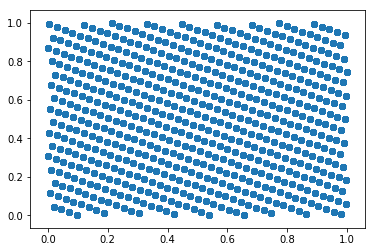

In [27]:
plt.scatter(random_numbers[0:-1:1], random_numbers[1::1])

Dies entspricht keinem guten Zufallszahlengenerator, weil zwei gleichverteilte Zufallszahlen auch wieder einer gleichverteilten Zufallszahl entsprechen sollten. In der obigen Abbildung ekennt man deutlich Ebenenen, was auf eine ungleichverteilte Menge von Zahlen schließen lässt.

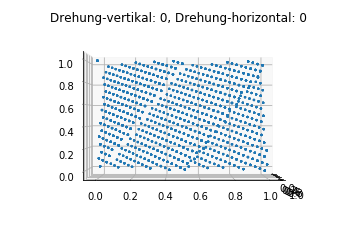

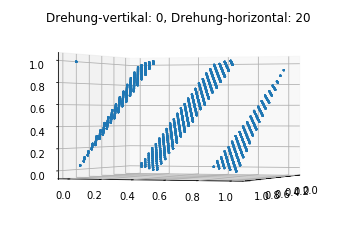

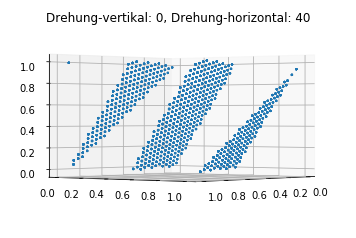

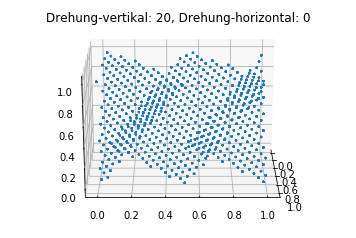

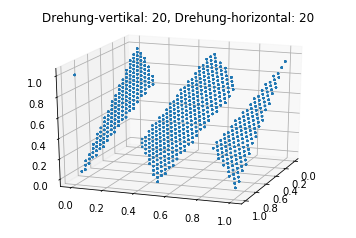

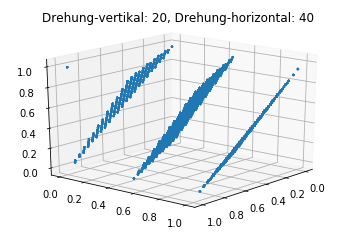

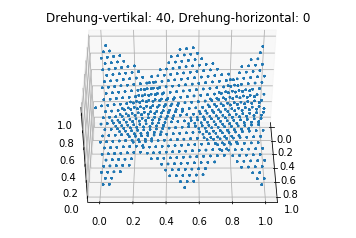

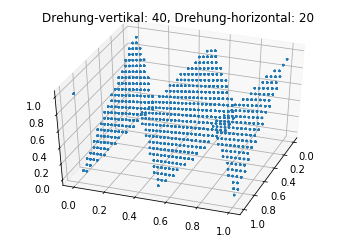

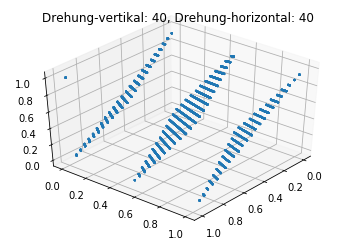

In [28]:
from mpl_toolkits.mplot3d import Axes3D
for i in range(0,45,20):
    for j in range(0,45,20):
        fig = plt.figure()
        ax = fig. add_subplot (111 , projection ='3d')
        ax.view_init(i, j) 
        ax.scatter(random_numbers[0:-2:1], random_numbers[1:-1:1], random_numbers[2::1], lw=0, s=5)
        plt.title(f'Drehung-vertikal: {i}, Drehung-horizontal: {j}')
        plt.show()

In der dreidimensionalen Darstellung erkennt man die Ungleichmäßige Verteilung noch besser.

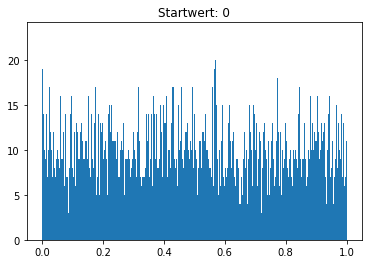

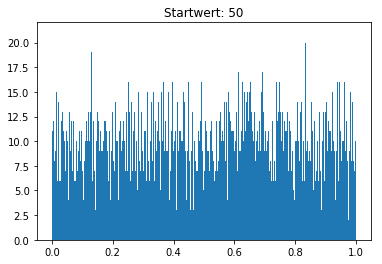

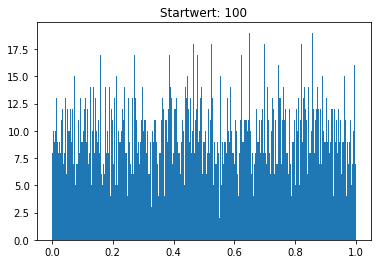

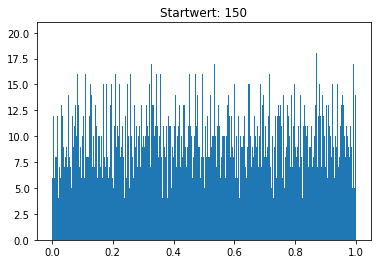

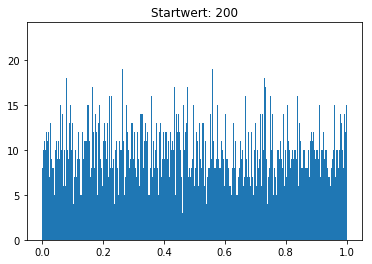

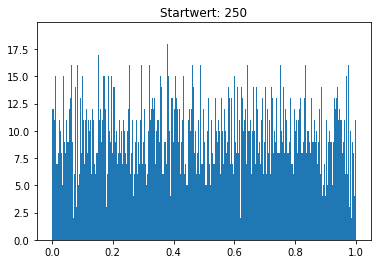

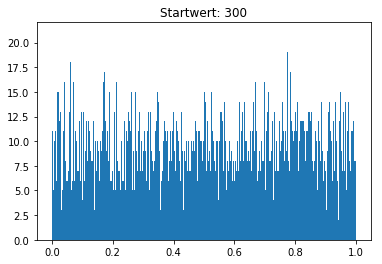

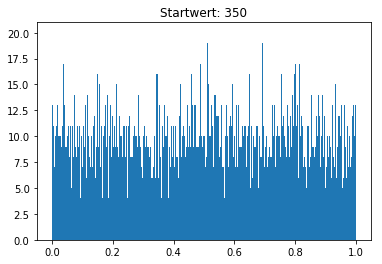

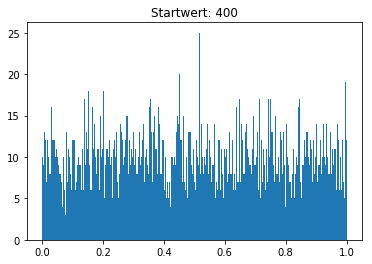

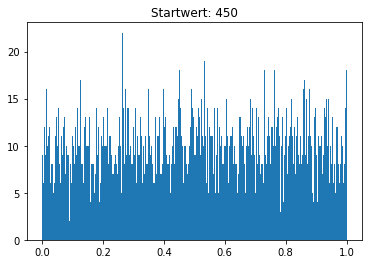

In [29]:
for i in range(0,500,50):
    np.random.seed(i)
    random_numbers_uni = np.random.uniform(size=10000)
    plt.hist(random_numbers_uni, bins=1000)
    plt.title(f'Startwert: {i}')
    plt.show()

Die Histogramme unterscheiden sich signifikanter voneinander.
Außerdem zeigt sich, das im Gegensatz zu den mit der `LCG` Funktion generierten Zufallszahlen, sich kaum Ebenen aufzeigen. Eine Eigenschaft die sich auch in den `Scatter` Plots zeigt.

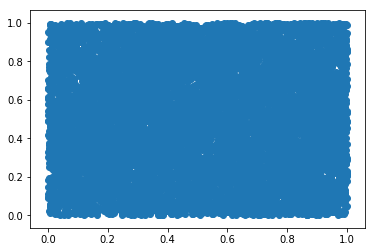

In [30]:
plt.scatter(random_numbers_uni[:-1:1],random_numbers_uni[1::1])

Deutlich erkennt man das es sich hier wieder um eine gleichverteilte Verteilung handelt.

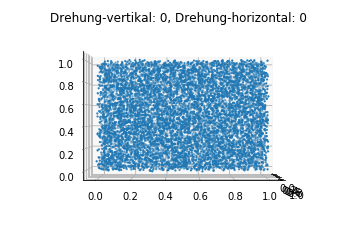

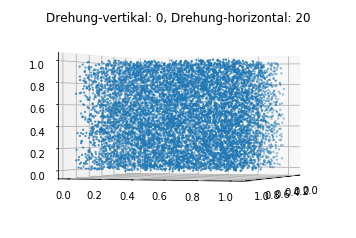

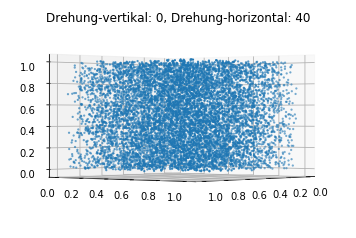

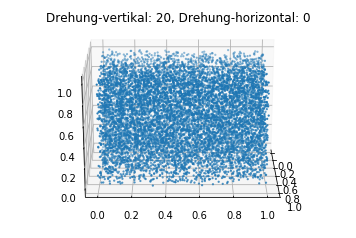

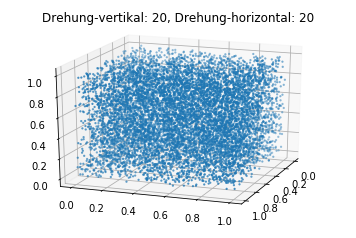

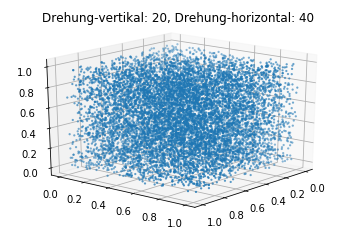

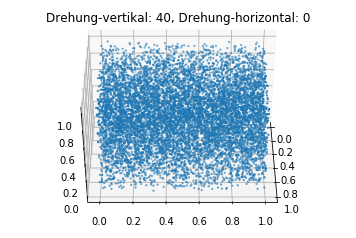

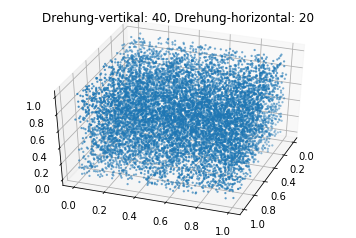

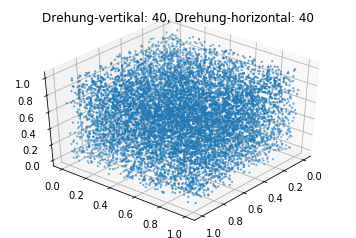

In [31]:
for i in range(0,45,20):
    for j in range(0,45,20):
        fig = plt.figure()
        ax = fig. add_subplot (111 , projection ='3d')
        ax.view_init(i, j) 
        ax.scatter(random_numbers_uni[0:-2:1], random_numbers_uni[1:-1:1], random_numbers_uni[2::1], lw=0, s=5)
        plt.title(f'Drehung-vertikal: {i}, Drehung-horizontal: {j}')
        plt.show()

Keine Ebenenen zu erkennen, sehr gut.

### Aufgabenteil e)

In [32]:
numbers_list = []
for i in range(0,100,1):
    random_numbers = LCG(1e4, i, a, b, m, norm = True, test_eff = False)
    length = len(random_numbers[random_numbers == 1/2])
    if length != 0:
        print('Möglicher Startwert:',i)
    numbers_list.append(length)

Möglicher Startwert: 8
Möglicher Startwert: 24
Möglicher Startwert: 40
Möglicher Startwert: 56
Möglicher Startwert: 72
Möglicher Startwert: 88


__Periodenlänge: 650__ !!!???

Es fällt auf das der erste Startwert bei dem $\frac{1}{2}$ erzeugt werden kann $8$ ist und danach alle $16$ Startwerte weiter der Nächste $\frac{1}{2}$ erzeugen kann.

# Nummer 3

## Aufgabenteil a)
Der *Korrelationskoeffizient* ist definiert als:

$$
\rho(x_i,x_j)=\frac{\mathrm{cov}(x_i,x_j)}{\sigma(x_i)\sigma(x_j)}
$$

Mit den Werten aus der Aufgabenstellung folgt somit:

In [33]:
cov_ij = 4.2
sigma_i = 3.5
sigma_j = 1.5

In [34]:
def korrelation_coe(cov, sigma_i, sigma_j):
    return cov/(sigma_i*sigma_j)

In [35]:
print('Der Korrelationskoeffizient beträgt:', korrelation_coe(cov_ij, sigma_i, sigma_j))

Der Korrelationskoeffizient beträgt: 0.8


## Aufgabenteil b)

Ist $f(\vec{x})$ eine $N$ dimensionale Gaußverteilung mit $\vec{x}\in\mathbb{R}^N$ Zahlen.
So lässt sich diese, nach der Vorlesung, schreiben als:

$$
f(\vec{x}) = k\exp\left(-\frac{1}{2}(\vec{x}-\vec{a})^\intercal\,\mathbf{B}\,(\vec{x}-\vec{a})\right), \quad \mathbf{B}\in\mathbb{R}^{N\times N}
$$

Die Verteilung lässt sich mit _standitisierten Variabelen_
$$
u_i = \frac{x_i-a_i}{\sigma_i}
$$
schreiben zu:
$$
f(\vec{u}) = k\exp\left(-\frac{1}{2}\vec{u}^\intercal\,\mathbf{B}\,\vec{u}\right)
$$

Linien gleicher Wahrscheinlichkeiten unterliegen der Bedingung:

$$
f(\vec{u})=\mathrm{const}
$$

Aus der Bedingung folgt direkt:

$$
\Rightarrow \quad -\frac{1}{2}\vec{u}^\intercal\,\mathbf{B}\,\vec{u} = \mathrm{const}\qquad (1)
$$
Die Matrix $\mathrm{B}$ ist die * inverse Kovarianzmatrix* und kann geschrieben werden als:

$$
\mathrm{B} = \frac{1}{A} \begin{pmatrix} \sigma_1^2 & -\mathrm{cov}(x_1,x_2) & \dots & -\mathrm{cov}(x_1,x_N) \\ -\mathrm{cov}(x_1,x_2) & \sigma_2^2 & \dots & -\mathrm{cov}(x_N,x_2) \\
\vdots & \vdots & \ddots & \vdots \\
-\mathrm{cov}(x_1,x_N) & -\mathrm{cov}(x_N,x_2) & \dots & \sigma_N^2 
\end{pmatrix}
$$

Hierbei ist der Vorfaktor $\frac{1}{A}\in\mathbb{R}$ der für den Beweis keine weitere Rolle spielt. Rechnerisch ergibt er sich bei der Invertierung der Kovaraianzmatrix.
Für man die Vektor- und Matrixmultiplikation in Gleichung __(1)__ aus ergibt sich:

$$
\Sigma_i^{N} \sigma_i^2u_i^2 - \Sigma_{i,j}^{N} \mathrm{cov}(x_i,x_j) u_i u_j = \mathrm{const}
$$

Das ist eine *Elipssengleichung*. Somit sind alle Kurven gleicher Wahrscheinlichkeit Ellipsen.

## Aufgabenteil c)

In [36]:
mu_x = 4
mu_y = 2

In [37]:
def two_d_gauss(x, y, mu_x, mu_y, sigma_x, sigma_y, cov):
    u_x = (x - mu_x) / sigma_x
    u_y = (y - mu_y) / sigma_y
    rho = cov / (sigma_x * sigma_y)
    nomination = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return 1/nomination * np.exp( (-1 / (2 * (1 - rho**2))) * ( u_x**2 + u_y**2 - 2*rho*u_x*u_y) )

Um die Verteilung zu Plotten generiere ich Zufallszahlen, um diese anschließend oben einzusetzen.

Man erkennt eine Zweidimensionale Gaußglocke, genau wie erwartet.
Plotte die Verteilung zusätzlich nochmal als Scatter Plot. Generiere dafür Zufallszahlen die gleich um die Maxima verteilt sind.

In [38]:
x = np.random.uniform(low=-2, high=9, size=100000)
y = np.random.uniform(low=-2, high=6, size=100000)
Z = two_d_gauss(x, y, mu_x, mu_y, sigma_i, sigma_j, cov_ij)

Um die Ellipse in die Grafik einzuzeichn, müssen wir zunächst die dazugehörige Ellipsengleichung herleiten:

$$\begin{aligned}
f(x)&\overset{!}{=}e^{-\frac{1}{2}}f_\mathrm{max}\\
-\frac{1}{2(1-\rho^2)}\left(u_x^2+u_y^2-2\rho u_x u_y\right)&=-\frac{1}{2}\\
\Leftrightarrow \quad u_x^2+u_y^2-2\rho u_x u_y &= 1-\rho^2
\end{aligned}$$

In [39]:
def ellipsengleichung(x, y, mu_x, mu_y, sigma_x, sigma_y, cov):
    u_x = (x - mu_x) / sigma_x
    u_y = (y - mu_y) / sigma_y
    rho = cov / (sigma_x * sigma_y)
    return u_x**2 + u_y**2 - 2*rho*u_x*u_y

Suche nun die $x$ und $y$ Werte die die obige Ellipsengleichung erfüllen.

In [40]:
y_ellpise = y[ np.abs(ellipsengleichung(x, y, mu_x, mu_y, sigma_i, sigma_j, cov_ij) - (1-korrelation_coe(cov_ij, sigma_i, sigma_j)**2)) <=1e-2]
x_ellipse = x[ np.abs(ellipsengleichung(x, y, mu_x, mu_y, sigma_i, sigma_j, cov_ij) - (1-korrelation_coe(cov_ij, sigma_i, sigma_j)**2)) <=1e-2]

## Aufgabenteil d)

Die Inverse Kovarianzmatrix (in $2D$) ist gegen durch:

$$
\mathbf{B}=\frac{1}{1+\rho^2} \begin{pmatrix} \sigma_1^2 & -\mathrm{cov}(x,y) \\ -\mathrm{cov}(x,y) & \sigma_2^2 \end{pmatrix}
$$
Die unkorrelierten Variabielen sind die die Eigenwerte der obigen Matrix:

$$\begin{aligned}
0&\overset{!}{=}\det(\mathbf{B}-\lambda \mathbf{{I}})\\
&=\frac{1}{1+\rho^2}\left(\lambda^2-\lambda(\sigma_x^2+\sigma_y^2)-\mathrm{cov}(x,y)^2+\sigma_x^2\sigma_y^2\right)\\
\Rightarrow \quad \lambda_{1/2} &= \frac{1}{1+\rho^2}\frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2+\sigma_y^2}{2}\right)^2+\mathrm{cov}(x,y)^2-\sigma_x^2\sigma_y^2}
\end{aligned}$$

In [41]:
def new_sigma(sigma_x, sigma_y, cov):
    rho =  cov  / (sigma_x + sigma_y)
    
    lambda_1 = 1 / (1 + rho**2) * (sigma_x**2 + sigma_y**2)/2 + np.sqrt( ( (sigma_x**2 + sigma_y**2) / (2) )**2 + cov**2 - sigma_x**2*sigma_y**2)
    lambda_2 = 1 / (1 + rho**2) * (sigma_x**2 + sigma_y**2)/2 - np.sqrt( ( (sigma_x**2 + sigma_y**2) / (2) )**2 + cov**2 - sigma_x**2*sigma_y**2)
    
    return lambda_1, lambda_2

In [42]:
new_sigma_x, new_sigma_y =  new_sigma(sigma_i, sigma_j, cov_ij)


Die transformierten $\sigma$ haben eine größe von:

In [43]:
print('Sigma_x` :', new_sigma_x)
print('Sigma_y` :', new_sigma_y)

Sigma_x` : 10.780634651653758
Sigma_y` : -2.279227522197848


### Bestimung der Drehmatrix

Allgemein ist eine Drehmatrix gegeben durch:

$$
\mathbf{R} = \begin{pmatrix} \cos(\vartheta) & -\sin(\vartheta) \\ \sin(\vartheta) & \cos(\vartheta) \end{pmatrix}
$$

Wir möchten nun die Matrix $\mathbf{B}$ Hauptachsentransformieren, dies erfolgt über die folgende Transformationsvorschrift:

$$
\begin{pmatrix} \lambda^1 & 0 \\ 0 & \lambda_2 \end{pmatrix} = \mathbf{R}^{-1}\mathbf{B}\mathbf{R} =\mathbf{R}^\intercal\mathbf{B}\mathbf{R} 
$$

Im folgenden werden die Argumente der $\sin$, $\cos$ und $\mathrm{cov}$ Terme weggelassen.

$$\begin{aligned}
\begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} &= \frac{1}{1+\rho^2}
\begin{pmatrix} \cos & \sin \\ -\sin & \cos \end{pmatrix}
\begin{pmatrix} \sigma_x^2 & -\mathrm{cov} \\ -\mathrm{cov} & \sigma_y^2 \end{pmatrix}
\begin{pmatrix} \cos & -\sin \\ \sin & \cos \end{pmatrix} \\
&=\frac{1}{1+\rho^2}\begin{pmatrix} \cos & \sin \\ -\sin & \cos \end{pmatrix}
\begin{pmatrix} \sigma_x^2\cos-\mathrm{cov}\sin & -\sin \sigma_x^2-\mathrm{cov}\cos \\
-\mathrm{cov}\cos+\sigma_y^2\sin & \mathrm{cov}\sin+\sigma_y^2\cos \end{pmatrix}\\
&=\frac{1}{1+\rho^2}\begin{pmatrix} \sigma_x^2\cos^2-2\mathrm{cov}\sin\cos+\sigma_y^2\sin^2 & -\cos\sin\sigma_x^2-\mathrm{cov}\cos^2+\mathrm{cov}\sin^2+\sigma_y^2\sin\cos \\
-\sigma_x^2\cos\sin+\mathrm{cov}\sin^2-\mathrm{cov}\cos^2+\sigma_y^2\sin\cos &
\sin^2\sigma_x^2+2\mathrm{cov}\cos\sin+\sigma_y^2\cos^2 \end{pmatrix}
\end{aligned}
$$

Berechne nun den Winkel $\vartheta$ für das untere linke Matrixelement:

$$\begin{aligned}
0&=(\sigma_y^2-\sigma_x^2)\sin\cos+\mathrm{cov}(\sin^2-\cos^2)\\
&=\frac{1}{2}\sin(2\vartheta)-\mathrm{cov}\cos(2\vartheta)\\
\Leftrightarrow \quad \vartheta &=\frac{1}{2}\arctan\left(\frac{2\mathrm{cov}}{\sigma_y^2-\sigma_x^2}\right)
\end{aligned}$$

In [44]:
def drehwinkel(sigma_x, sigma_y, cov):
    return 1/2 * np.arctan( (2*cov)/(sigma_y**2-sigma_x**2))

Der Drehwinkel liegt bei:

In [45]:
print('Drehwinkel in Grad:', np.rad2deg(drehwinkel(sigma_i, sigma_j, cov_ij)))

Drehwinkel in Grad: -20.015129635944852


In [46]:
def rotate(x, alpha): 
    #function that rotates a given vector x by an angle alpha. 
    matrix = np.array([[np.cos(alpha), np.sin(alpha)], 
                       [-np.sin(alpha), np.cos(alpha)]] )
    return matrix.dot(x)

old_x_axis = np.array([1, 0])
old_y_axis = np.array([0, 1])

new_x_axis = rotate(old_x_axis, drehwinkel(sigma_i, sigma_j, cov_ij))
new_y_axis = rotate(old_y_axis, drehwinkel(sigma_i, sigma_j, cov_ij))

## Aufgabenteil e)
Die bedingte Wahrscheinlichkeit $f(x|y)$ bzw. $f(y|x)$ kann mathematisch geschrieben werden als:

$$
f(x_i|x_j) = \frac{f(x_i,x_j)}{\int_{\mathbb{D_i}}\, f(x_i,x_j) \mathrm{d}x_i}
$$

Wobei $\mathbb{D}_i$ der zu $x_i$ gehörige Definitionsbereich ist.

Beginnen wir zunächst mit:
$$\begin{aligned}
f(x|y) &= \frac{f(x,y)}{\int_{-\infty}^{\infty} f(x,y) \mathrm{d}x}
\end{aligned}$$

Die Verteilung $f(x,y)$ ist gegeben durch:

$$\begin{aligned}
f(x,y) &= N \exp\left( -\Gamma\left( \left(\frac{x-\mu_x}{\sigma_x}\right)^2 +\left(\frac{y-\mu_y}{\sigma_y}\right)^2 - 2\rho\left(\frac{x-\mu_x}{\sigma_x}\right)\left(\frac{y-\mu_y}{\sigma_y}\right)\right)\right)\\
mit \\
N &= \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-\rho^2}}\\
\Gamma &= \frac{1}{2(1-\rho^2)}\\
\rho &= \frac{\mathrm{cov}(x,y)}{\sigma_x\sigma_y}
\end{aligned}$$

Beginne mit dem Nenner:

$$\begin{aligned}
\int_{-\infty}^{\infty} f(x,y) \,\mathrm{d}x &= N\int_{-\infty}^{\infty} \exp\left( -\Gamma\left( \left(\frac{x-\mu_x}{\sigma_x}\right)^2 +\left(\frac{y-\mu_y}{\sigma_y}\right)^2 - 2\rho\left(\frac{x-\mu_x}{\sigma_x}\right)\left(\frac{y-\mu_y}{\sigma_y}\right)\right)\right)\mathrm{d}x \\
\mathrm{Subsituition:}\qquad u_x &= \frac{x-\mu_x}{\sigma_x}, \quad \mathrm{d}x=\sigma_x\mathrm{d}u_x \\
&=N\sigma_x\int_{-\infty}^{\infty}\exp\left(-\Gamma\left(u_x^2+u_y^2-2\rho u_x u_y\right)\right)\mathrm{d}u_x\\
&=N\sigma_x\exp\left(-\left(\Gamma+\Gamma\rho^2\right)u_y^2\right)\int_{-\infty}^{\infty}\exp\left(-\Gamma\left(u_x-\rho u_y\right)^2\right) \mathrm{d}u_x\\
&=N\sigma_x\exp\left(-\left(\Gamma+\Gamma\rho^2\right)u_y^2\right)\sqrt{\frac{\pi}{\Gamma}}
\end{aligned}$$

Damit ergibt sich für die bedingte Wahrscheinlichkeit:

$$\begin{aligned}
f(x|y) &= \frac{f(x,y)}{\int_{-\infty}^{\infty} f(x,y)\mathrm{d}x}\\
&=\frac{N\exp\left(-\Gamma\left(u_x^2+u_y^2-2\rho u_x u_y\right)\right)\sqrt{\Gamma}}{N\sigma_x\exp\left(-\left(\Gamma-\Gamma\rho^2\right)u_y^2\right)\sqrt{\pi}}\\
&=\frac{1}{\sigma_x}\exp\left(-\Gamma\left(u_x-\rho u_y\right)^2\right)
\end{aligned}$$

Analog folgt für $f(y|x)$:

$$
f(y|x)=\frac{1}{\sigma_y}\exp\left(-\Gamma\left(u_y-\rho u_x\right)^2\right)
$$


## Aufgabenteil f)

Der bedingte Erwartungswert $E(x_i|x_j)$ ist gegeben durch:

$$
E(x_i|x_j) = \int_{\mathbb{D}_i} x_i\, f(x_i|x_j)\,\mathrm{d}x_i
$$

Wobei $\mathbb{D}_i$ der zu $x_i$ gehörige Definitionsbereich ist.

Berechne zunächst $E(x|y)$:

$$\begin{aligned}
E(x|y) &= \int_{-\infty}^{\infty} x f(x|y)\mathrm{d}x\\
&= \sqrt{\frac{\Gamma}{\pi}}\int_{-\infty}^{\infty} x \frac{1}{\sigma_x} \exp\left(-\Gamma(u_x-\rho u_y\right)^2\mathrm{d}x\\
\mathrm{Substituiere:}\qquad u_x&=\frac{x-\mu_x}{\sigma_x}, \quad \mathrm{d}x=\sigma_x\mathrm{d}u_x\\
&=\sqrt{\frac{\Gamma}{\pi}}\int_{-\infty}^{\infty}(u_x\sigma_x+\mu_x)\exp\left(-\Gamma(u_x-\rho u_y\right)^2\mathrm{d}u_x\\
&=\sqrt{\frac{\Gamma}{\pi}}\left(\int_{-\infty}^{\infty} u_x \sigma_x \exp\left(-\Gamma(u_x-\rho u_y\right)^2\mathrm{d}u_x  +\int_{-\infty}^{\infty} \mu_x \exp\left(-\Gamma(u_x-\rho u_y\right)^2\mathrm{d}u_x\right)\\
&=\rho\sigma_x u_y + \mu_x
\end{aligned}$$

Analog ergibt sich für $E(y|x)$:

$$
E(y|x)=\rho\sigma_y u_x + \mu_y
$$

In [47]:
def bedingter_erw(x, y, sigma_x, sigma_y, mu_x, mu_y, cov, condition):
    rho = cov / (sigma_x * sigma_y)
    u_x = (x - mu_x) / sigma_x
    u_y = (y - mu_y) / sigma_y
    
    if condition == 'x':
        return rho * sigma_x * u_y + mu_x
    elif condition == 'y':
        return rho * sigma_y * u_x + mu_y
    else: 
        print('Wrong condition')


In [48]:
bedingt_erw_x = bedingter_erw(x, y, sigma_i, sigma_j, mu_x, mu_y, cov_ij, 'x')
bedingt_erw_y = bedingter_erw(x, y, sigma_i, sigma_j, mu_x, mu_y, cov_ij, 'y')

In [49]:
def linear_function_from_vector(x, vec, center): 
    # linear funtion along a vector x
    return vec[1] / vec[0] * (x - center[0]) + center[1]

xplot = np.linspace(-2, 9, 10000)

new_y_axis_values = linear_function_from_vector(xplot, new_y_axis, (mu_x, mu_y))
new_x_axis_values = linear_function_from_vector(xplot, new_x_axis, (mu_x, mu_y))


Plotte das Gesamtergebnisse.

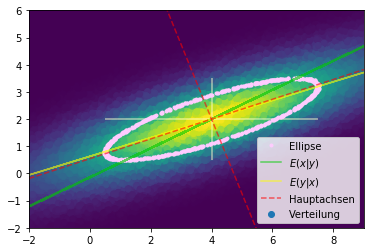

In [50]:
plt.scatter(x, y, c=Z, label='Verteilung')
plt.errorbar(mu_x, mu_y, xerr = sigma_i, yerr = sigma_j, alpha=0.6, color='#ffffcc')
plt.plot(x_ellipse, y_ellpise, '.', color = '#ffccff', label='Ellipse')

plt.plot(bedingt_erw_x, y, '-', color='#00cc00', alpha=0.6, label =r'$E(x|y)$')
plt.plot(x, bedingt_erw_y, '-', color='#ffff00', alpha=0.6, label =r'$E(y|x)$')

plt.plot(xplot, 
        linear_function_from_vector(xplot, new_x_axis, (mu_x, mu_y)), 
        color = 'r', linestyle = '--', label = 'Hauptachsen', alpha=0.6)
plt.plot(xplot, 
        linear_function_from_vector(xplot, new_y_axis, (mu_x, mu_y)), 
        color = 'r', linestyle = '--', alpha=0.6)

plt.xlim(-2, 9)
plt.ylim(-2, 6)
plt.legend(loc='lower right')